<a href="https://colab.research.google.com/github/RajanTucker/RajanTucker/blob/main/Spam_Ham__Filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [3]:
import numpy as np # for array
import pandas as pd # for data frame to structure data
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.feature_extraction.text import CountVectorizer

Reading Data file ie maildata.csv

In [4]:
cluster_df=pd.read_csv('/content/clusterdata.csv')

In [5]:
cluster_df

,text,spam
0,Subject: naturally irresistible your corporate...,1.0
1,Subject: the stock trading gunslinger fanny i...,1.0
2,Subject: unbelievable new homes made easy im ...,1.0
3,Subject: 4 color printing special request add...,1.0
4,"Subject: do not have money , get software cds ...",1.0
...,...,...
5733,Subject: re : research and development charges...,0.0
5734,"Subject: re : receipts from visit jim , than...",0.0
5735,Subject: re : enron case study update wow ! a...,0.0
5736,"Subject: re : interest david , please , call...",0.0


In [6]:
cluster_df.head()


,text,spam
0,Subject: naturally irresistible your corporate...,1.0
1,Subject: the stock trading gunslinger fanny i...,1.0
2,Subject: unbelievable new homes made easy im ...,1.0
3,Subject: 4 color printing special request add...,1.0
4,"Subject: do not have money , get software cds ...",1.0


In [7]:
cluster_df.tail()

,text,spam
5733,Subject: re : research and development charges...,0.0
5734,"Subject: re : receipts from visit jim , than...",0.0
5735,Subject: re : enron case study update wow ! a...,0.0
5736,"Subject: re : interest david , please , call...",0.0
5737,Subject: news : aurora 5 . 2 update aurora ve...,0.0


In [8]:
cluster_df.shape

(5738, 2)

In [9]:

cluster_df= cluster_df.where((pd.notnull(cluster_df)),"")

In [10]:
cluster_df.shape


(5738, 2)

In [11]:
print("no of rows",len(cluster_df))

no of rows 5738


In [12]:
cluster_df.spam.value_counts()

0.0    4360
1.0    1368
         10
Name: spam, dtype: int64

In [13]:
cluster_df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1.0
1,Subject: the stock trading gunslinger fanny i...,1.0
2,Subject: unbelievable new homes made easy im ...,1.0
3,Subject: 4 color printing special request add...,1.0
4,"Subject: do not have money , get software cds ...",1.0


### I want to change columns text heading to Subject as text sounds more of phone text **messages**

In [14]:
cluster_df.columns=["Subject","Spam"]

In [15]:
cluster_df.head()

,Subject,Spam
0,Subject: naturally irresistible your corporate...,1.0
1,Subject: the stock trading gunslinger fanny i...,1.0
2,Subject: unbelievable new homes made easy im ...,1.0
3,Subject: 4 color printing special request add...,1.0
4,"Subject: do not have money , get software cds ...",1.0


In [16]:
cluster_df.Spam.value_counts()

0.0    4360
1.0    1368
         10
Name: Spam, dtype: int64

In [17]:
cluster_df.describe()

,Subject,Spam
count,5738,5738.0
unique,5698,3.0
top,,0.0
freq,8,4360.0


In [18]:
cluster_df['length']=cluster_df['Subject'].apply(len)

<Axes: ylabel='Frequency'>

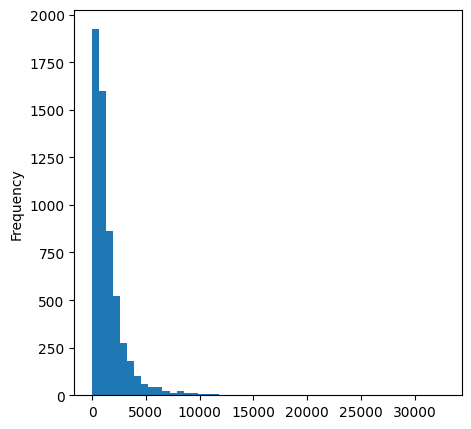

In [19]:
cluster_df['length'].plot(bins=50,kind='hist',figsize=(5,5))

array([[<Axes: title={'center': '0.0'}>, <Axes: title={'center': '1.0'}>],
       [<Axes: >, <Axes: >]], dtype=object)

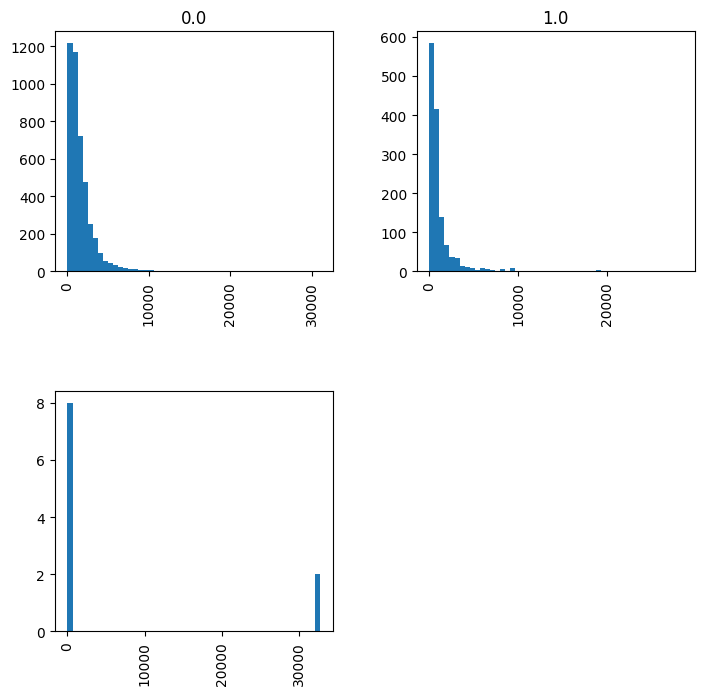

In [20]:
cluster_df.hist(column='length',by='Spam',bins=50,figsize=(8,8))

In [21]:
cluster_df.loc[:,'Spam']=cluster_df.Spam.map({'Ham':0,'Spam':1})

<ipython-input-21-8562f533c263>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  cluster_df.loc[:,'Spam']=cluster_df.Spam.map({'Ham':0,'Spam':1})


In [ ]:
cluster_df.tail()

,Subject,Spam
5733,Subject: re : research and development charges...,0.0
5734,"Subject: re : receipts from visit jim , than...",0.0
5735,Subject: re : enron case study update wow ! a...,0.0
5736,"Subject: re : interest david , please , call...",0.0
5737,Subject: news : aurora 5 . 2 update aurora ve...,0.0


In [30]:
from IPython.utils import text

count=CountVectorizer()
input=['Subject: re : receipts from visit jim , than...']
text=count.fit_transform(cluster_df["Subject"])
x_train, x_test, y_train, y_test= train_test_split(cluster_df['Subject'], cluster_df['Spam'], test_size=0.20, random_state=1)
text

<5738x37280 sparse matrix of type '<class 'numpy.int64'>'
	with 707928 stored elements in Compressed Sparse Row format>